In [3]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [42]:
# import csv file
df = pd.read_csv('customer_shopping_data.csv', encoding= 'unicode_escape')

In [43]:
df.shape

(99457, 10)

In [44]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [46]:
#check for null values
pd.isnull(df).sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [47]:
# drop null values
df.dropna(inplace=True)

In [48]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [49]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# Exploratory Data Analysis

### Gender

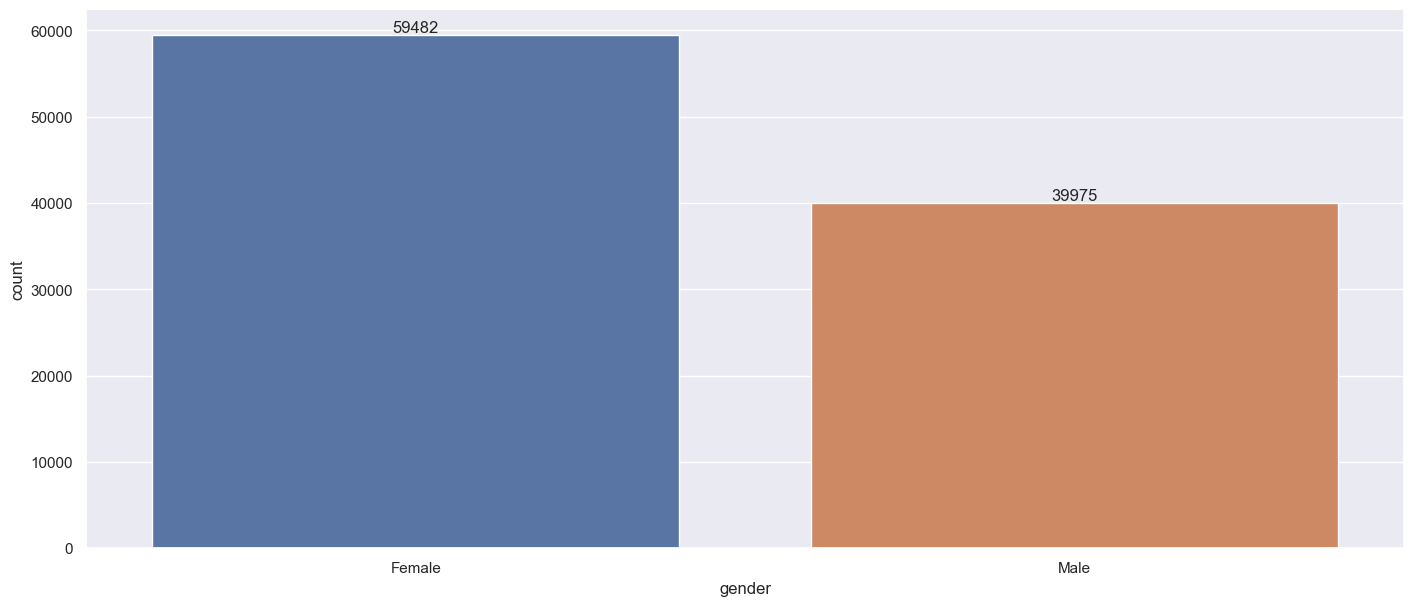

In [51]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='gender', ylabel='quantity'>

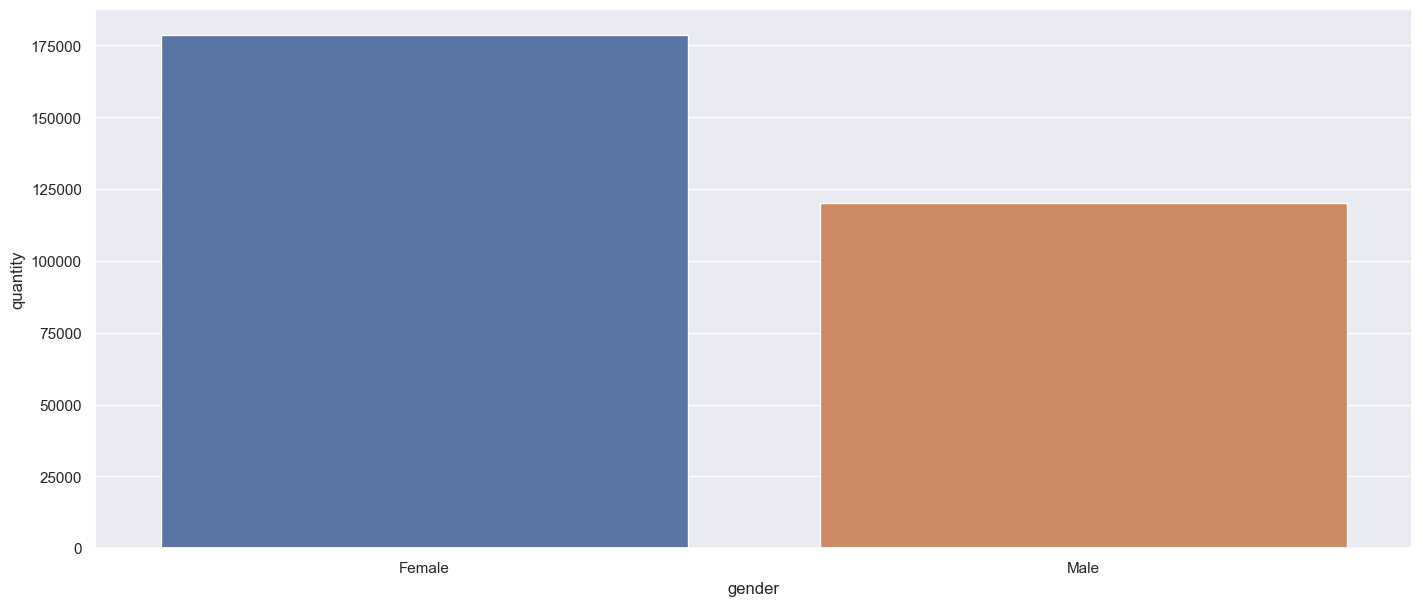

In [52]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['gender'], as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False)

sns.barplot(x = 'gender',y= 'quantity' ,data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

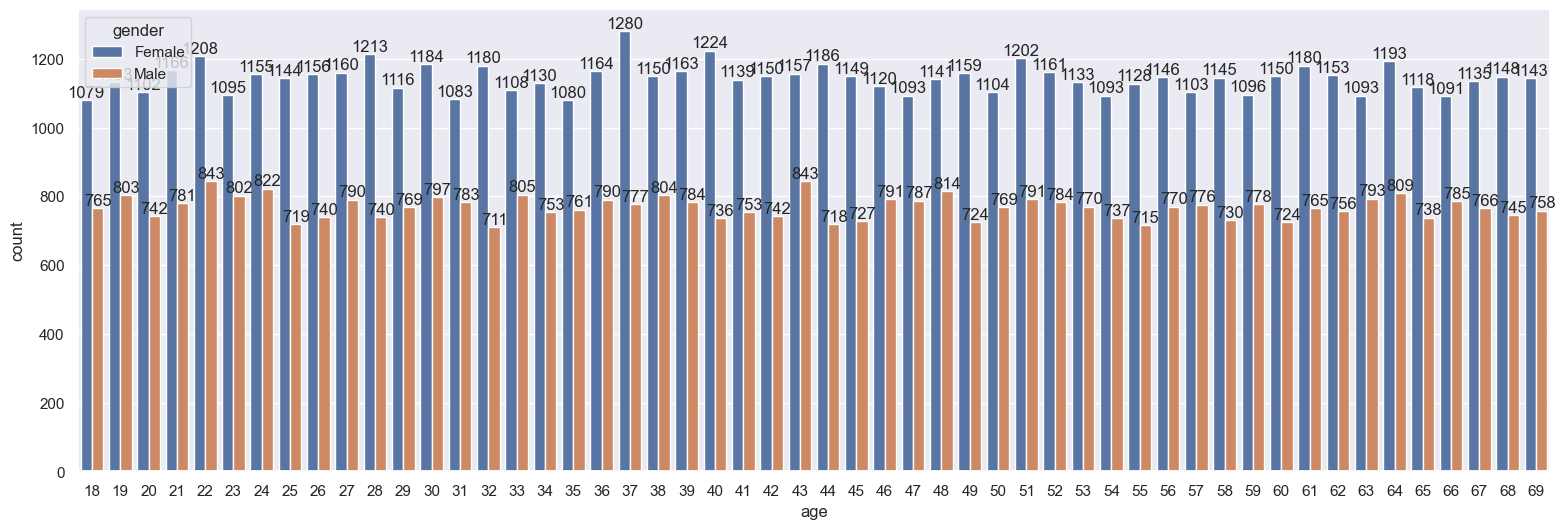

In [78]:
ax = sns.countplot(data = df, x = 'age', hue = 'gender')


for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(15,6)})



### SHOPPING_MALL

<Axes: xlabel='shopping_mall', ylabel='quantity'>

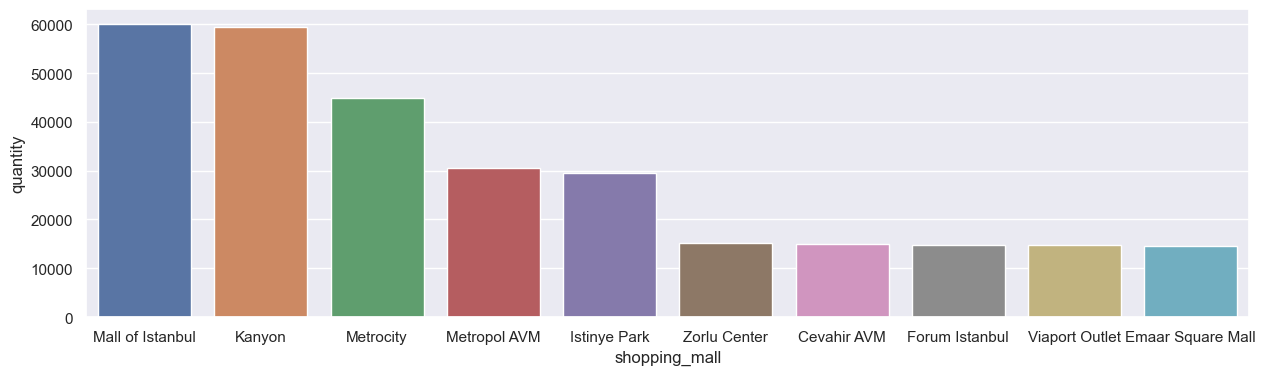

In [80]:
# total number of orders from top 10 states

sales_state = df.groupby(['shopping_mall'], as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,)})
sns.barplot(data = sales_state, x = 'shopping_mall',y= 'quantity')

*From above graphs we can see that most of the orders & total sales/amount are from Mall of istanbul, kanyon, metrocity respectively



### CATEGORY AND PRICE

<Axes: xlabel='category', ylabel='price'>

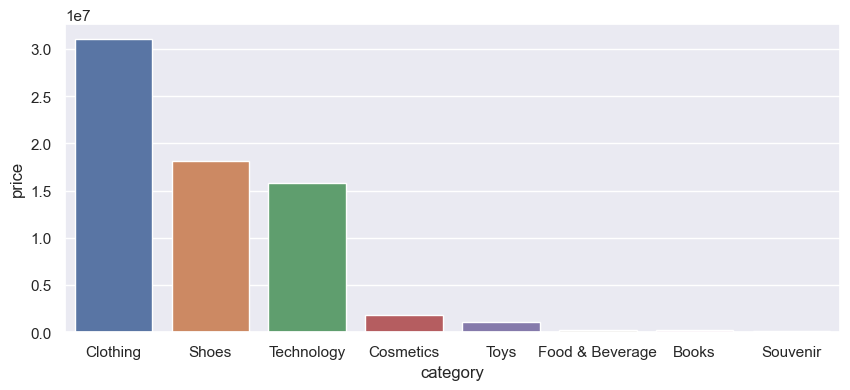

In [70]:
sales_category = df.groupby(['category'], as_index=False)['price'].sum().sort_values(by='price', ascending=False).head(10)

sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data = sales_category, x = 'category',y= 'price')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### PAYMENT METHOD

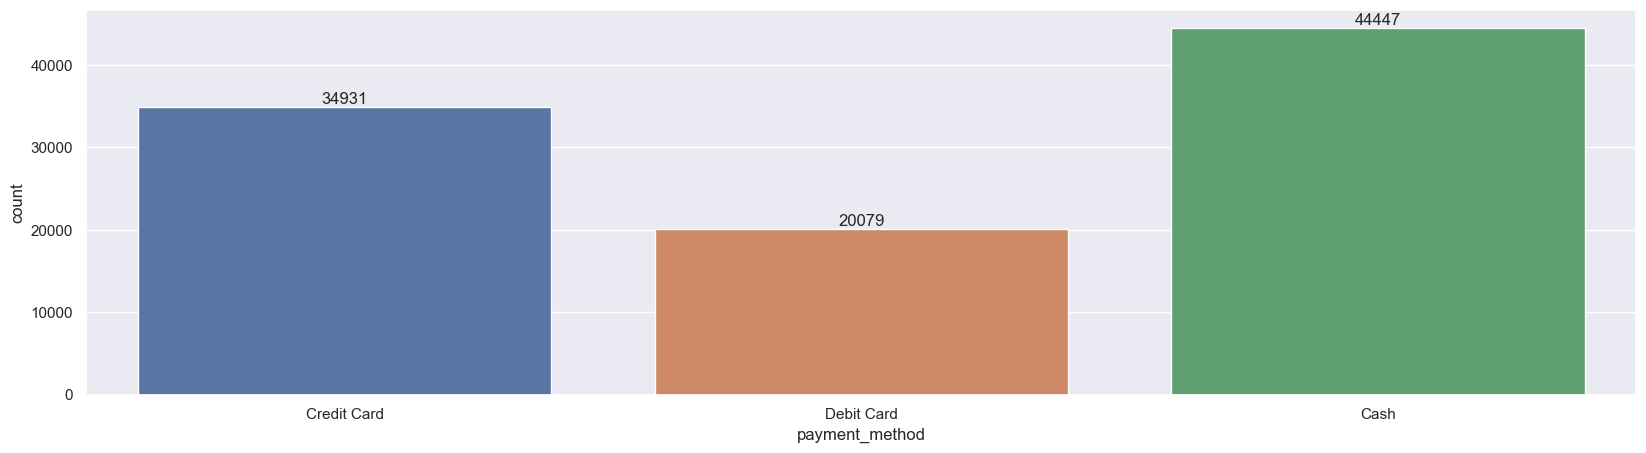

In [60]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'payment_method')

for bars in ax.containers:
    ax.bar_label(bars)

### Product Category

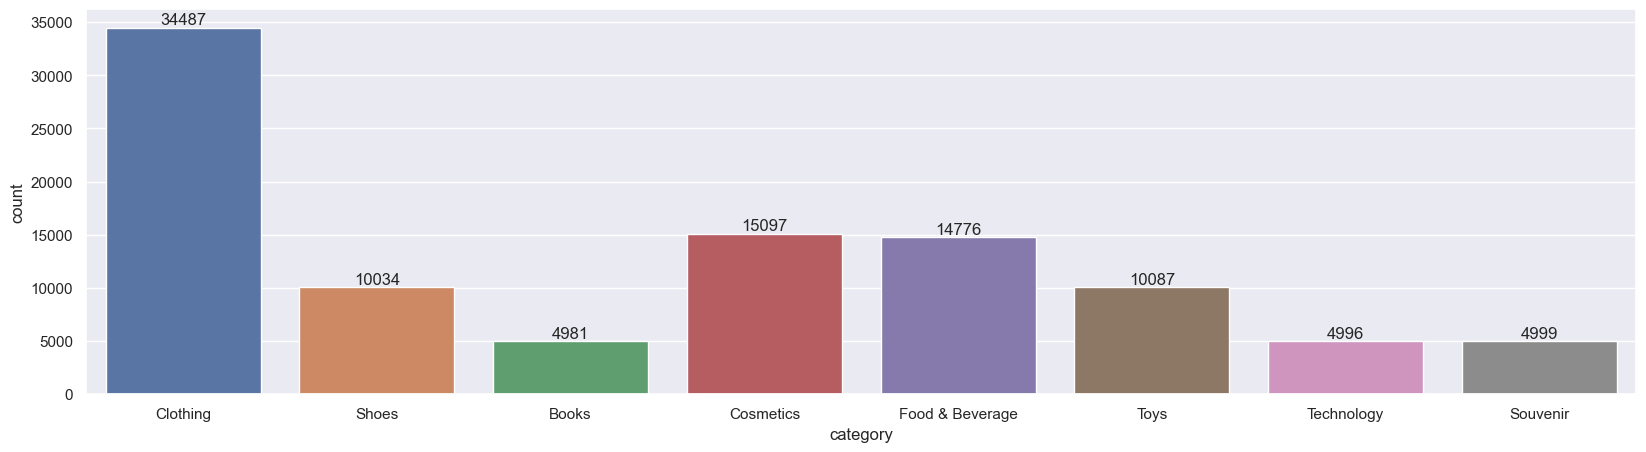

In [61]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='category', ylabel='quantity'>

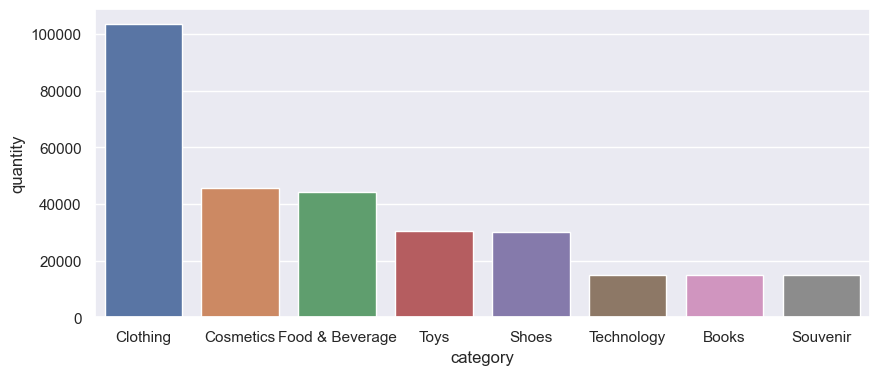

In [71]:
sales_age = df.groupby(['category'], as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False)

sns.barplot(x = 'category',y= 'quantity' ,data = sales_age)


*From above graphs we can see that most of the sold products are from Clothing, Food, and cosmetics*

Thank you!